# Here i am going to present the ANN which is Artificial Neural Network  on a dataset of bacterial and viral pneumonia on chest X-rays images.

## Actually it is a part of big initiative which is Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning.
## This has potential for generalized high-impact application in biomedical imaging

## For today we only going through a dataset of pneumonia .

## Website to refer-https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5


# Introduction

Pneumonia is the filling of air vesicles in the lung with an inflamed fluid. Viruses, bacteria, 
and rarely fungal infections cause it. Pneumonia can be diagnosed by examinening the X-Ray chest 
radiography by doctors. We will do it instead of doctors this time.

In [1]:
#importing Libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import os
#this os is imported in order to get dirname and pathname

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import cv2 as cv
#Cv2 is used as essential dataset in the image classification.
import seaborn as sns

In [2]:
# here we are getting the dirname and corresponding file name as goind to make a dataset in which we can put these
paths_normal = []
paths_pneumonia = []


for dirname, _, filenames in os.walk(r"C:\Users\Acer pc\OneDrive - Manav Rachna Education Institutions\Desktop\dataset\chest_xray\train"):
    for filename in filenames:
        paths_normal.append(os.path.join(dirname, filename))
    

for dirname, _, filenames in os.walk(r"C:\Users\Acer pc\OneDrive - Manav Rachna Education Institutions\Desktop\dataset\chest_xray\test"):
    for filename in filenames:
        paths_pneumonia.append(os.path.join(dirname, filename))

# Data Preprocessing 

We can do feature selection as we have an image dataset that means it is not possible to select features from it and we have the database with unlabeled data.
So,We must do labelling by ourself . So 0 normal images and 1 for pneumonia images. We can also go for types of pneumonia images as viral and bacterial but we dont have enough time to perform that many tasks.

For this we only going to use the dataset to distinguish the difference betweeen the normal and pneumonia images.

We have some 500 images for each nomral and pneunomia so we must create a labels for each.


In [3]:
# here label_normal is the array of 500 rows and 1 column containg 0s.
label_normal = np.zeros((500,1))

# here label_pneumonia is the array of 500 rows and 1 column containg 1s.
label_pneumonia = np.ones((500,1))

#the main purpose of concatinating them is to make a dataset with label 0 and 1
label = list(np.concatenate((label_normal,label_pneumonia),axis = 0));
paths = paths_normal[0:500] + paths_pneumonia[0:500]

#this d is actually a dataset but without the dataframe it's just a normal table with their paths and it labels
d = {'paths': paths, 'label': label
    }
df = pd.DataFrame(data=d)

we used two labels which is 0 and 1 that means it is a case of binary classification.

In [4]:
df

,paths,label
0,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0.0]
1,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0.0]
2,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0.0]
3,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0.0]
4,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[0.0]
...,...,...
995,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[1.0]
996,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[1.0]
997,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[1.0]
998,C:\Users\Acer pc\OneDrive - Manav Rachna Educa...,[1.0]


In [5]:
df.shape

(1000, 2)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paths   1000 non-null   object
 1   label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


#### Now the dataframe is made we can processed further but we need to resize the images as they all are of different dimentions actually we are using an enumerator to update the values of count and ele in order to vertically stack them and able to resize them . 

#### As resize is essential as every image has different dimensions so , we are using cv.resize to make them into 100*100 size

In [7]:
X = np.zeros((1,100*100),np.uint8)#this uint 8 is defining in 8 bit
y = np.zeros((1,1),np.uint8)

'''The for loop iterates over the rows of the first column (df.iloc[:,0]) of
a pandas DataFrame (df), with the enumerate function used to keep track 
of the index (count) and value (ele) of each row.'''

#we also vstack the y onto the dataset Within the loop, the code reads in an image file s
for count,ele in enumerate (df.iloc[:,0],0): 
    y_temp = df.iloc[count,1]
    y = np.vstack((y,y_temp))
    X_temp = cv.imread(ele,cv.IMREAD_GRAYSCALE) 
    X_temp = cv.resize(X_temp,(100,100)).reshape(1,100*100)
    X = np.vstack((X,X_temp))
    if count/10 >= 99.9:
        print("Done")
X = X[1:,:]
y = y[1:,:]

Done


In [8]:
#now we have X and y and X is the updated array after the vertical stack , vertical stack and resize in order to maintian norma;lization among the dataset.
X

array([[ 22,  18,  24, ...,  86,  89,  91],
       [ 18,  31,  35, ...,   0,   0,   0],
       [  0,   0,  27, ...,   0,   0,   2],
       ...,
       [  0,   0, 255, ...,   0,   0,   0],
       [  4,   8,  11, ...,   0,   0,   0],
       [  5,  18,  34, ...,   0,   0,   0]], dtype=uint8)

In [9]:
#This y is actually the labels .
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# Test and train split

####  Spliting the dataset into two parts which is training set and testing set , for our case the training set is 90 and testing set is 10 in ratio.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train

In [36]:
X_train[0]

array([[[0.21176471],
        [0.21176471],
        [0.24313725],
        ...,
        [0.40392157],
        [0.37647059],
        [0.23921569]],

       [[0.2       ],
        [0.23921569],
        [0.25882353],
        ...,
        [0.41176471],
        [0.4745098 ],
        [0.58823529]],

       [[0.22745098],
        [0.23921569],
        [0.25882353],
        ...,
        [0.42352941],
        [0.40784314],
        [0.40784314]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [12]:
X_test

array([[  0,   0,   0, ...,   0,   0,   0],
       [ 40,  45,  49, ...,   6,  10,  10],
       [145,  99,  24, ...,  18,  19,  19],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [ 41,  54,  64, ...,  20,  21,  23],
       [  0,   0,   6, ...,   0,   0,   0]], dtype=uint8)

In [13]:
print(y_train)

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.

In [14]:
# Sizes of the X train , y train , y test , x test

In [15]:
print(X_train.shape)

(900, 10000)


In [16]:
print(y_train.shape)


(900, 1)


In [17]:
print(X_test.shape)


(100, 10000)


In [18]:
print(y_test.shape)


(100, 1)


### As we can see we split the dataste into 90:10 into train:test

# Visulaization

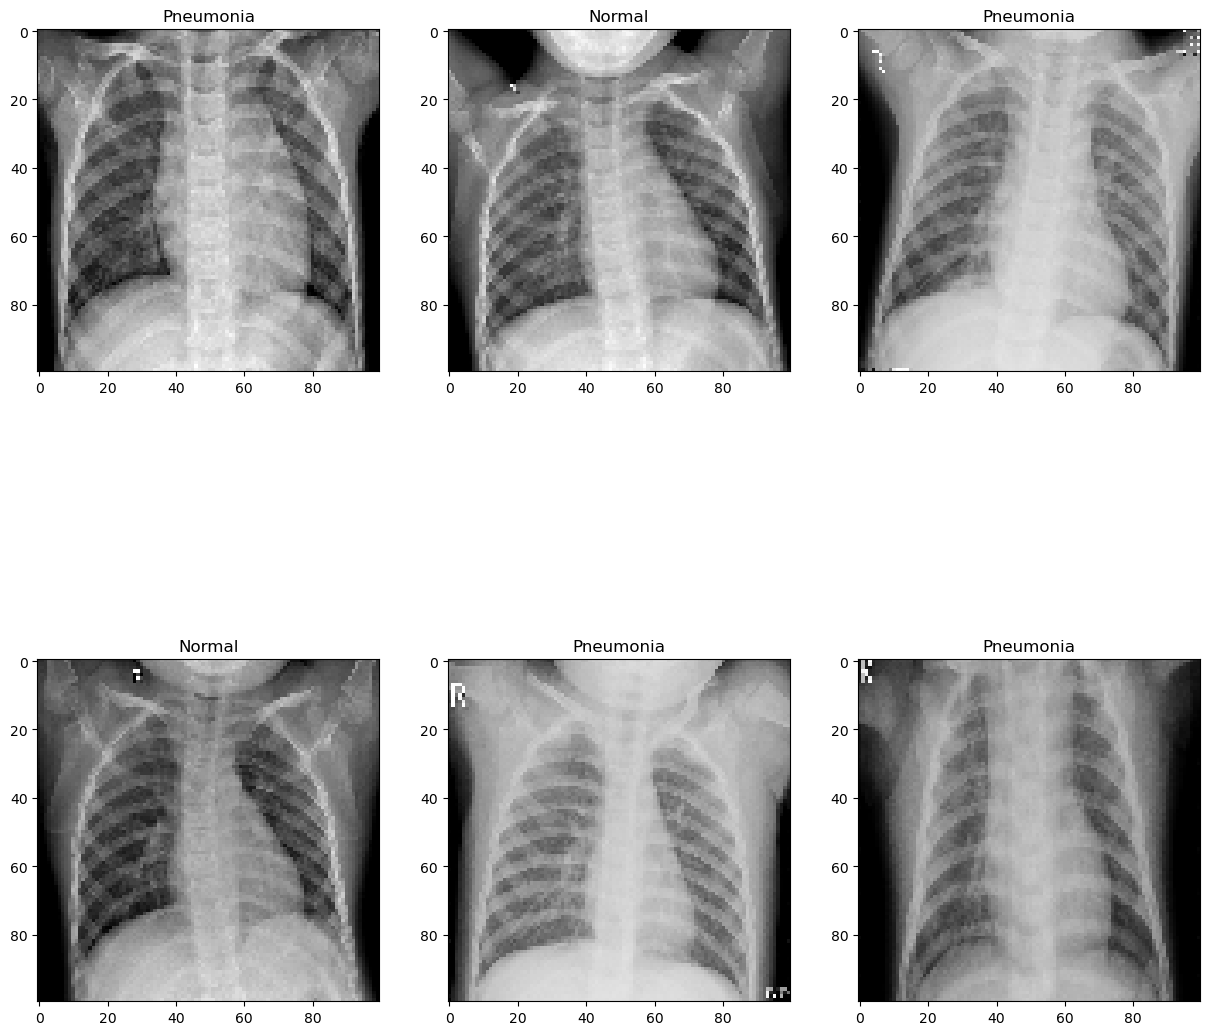

In [19]:
#subplot is used in order to see multiple plots as once 
#WE only going to see 6 images of the X-ray as we pass the range from 0 to 6
plt.figure(figsize=(15,15))
for count,i in enumerate(range(0,6),231):
    
    plt.subplot(count)
    if y_train[i]==1:
        plt.title("Pneumonia")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')
        
    elif y_train[i]==0:
        plt.title("Normal")
        plt.imshow(X_train[i,:].reshape(100,100),'gray')
plt.show()        

#Here we can see the two different X-ray which indicates the normal and pneumonia images , but for demonstration we are only 
# using two labels as 1 and 0 . but further we can also divide the set 

# Scaling

### Scaling is necessary as we dont want any biasing towards any values

In [20]:
X_train,X_test = X_train[:,:]/255, X_test[:,:]/255

# CNN

In [21]:
 

#Initialising the CNN
cnn = Sequential()
cnn.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[100,100,1]))  # 1 is our canal number it is just 1 because we use grayscale data
cnn.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu'))

#Pooling
cnn.add(layers.MaxPool2D(pool_size=2,strides=2)) #I preffered Max Pooling for this model
cnn.add(Dropout(0.2))

#Second Layer
cnn.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.2))



#Flattening and bulding ANN

cnn.add(Flatten())
cnn.add(Dense(64, activation = "relu"))
cnn.add(Dense(32, activation = "relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation = "sigmoid")) 

## Compiling

In [22]:
cnn.compile(optimizer = 'rmsprop',loss = "binary_crossentropy",metrics = ['accuracy'])

In [23]:
## Reshaping so that all the layers will get a same 

In [24]:
X_train = X_train.reshape(-1,100,100,1)
X_test = X_test.reshape(-1,100,100,1)

In [25]:
# we are using data AUgmentaiton so that we can maipulate some images if they ahave some sort of rotation etc

## Data Augmentaton

In [26]:
datagen = ImageDataGenerator(
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False) 

datagen.fit(X_train)

## Fitting

In [27]:
cnn.fit_generator(datagen.flow(X_train,y_train, batch_size=20),epochs = 30, validation_data = (X_test,y_test),steps_per_epoch=len(X_train) // 20)


C:\Users\Acer pc\AppData\Local\Temp\ipykernel_10460\3855104953.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(datagen.flow(X_train,y_train, batch_size=20),epochs = 30, validation_data = (X_test,y_test),steps_per_epoch=len(X_train) // 20)


Epoch 1/30
45/45 [==============================] - 68s 1s/step - loss: 0.7390 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 2/30
45/45 [==============================] - 60s 1s/step - loss: 0.6972 - accuracy: 0.5122 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 3/30
45/45 [==============================] - 47s 1s/step - loss: 0.6937 - accuracy: 0.4711 - val_loss: 0.6930 - val_accuracy: 0.5200
Epoch 4/30
45/45 [==============================] - 46s 1s/step - loss: 0.6936 - accuracy: 0.4756 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 5/30
45/45 [==============================] - 46s 1s/step - loss: 0.7023 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4800
Epoch 6/30
45/45 [==============================] - 47s 1s/step - loss: 0.6958 - accuracy: 0.4933 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 7/30
33/45 [=====================>........] - ETA: 12s - loss: 0.6937 - accuracy: 0.4697

KeyboardInterrupt: 

In [ ]:
cnn.save('my_model.h6')

In [ ]:

loaded_model = tf.keras.models.load_model('my_model.h6')
loaded_model

## Predicton

In [ ]:
predicted = cnn.predict(X_test)

y_head_cnn = [0 if i<0.5 else 1 for i in predicted]

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_head_cnn))
cm_cnn = confusion_matrix(y_test,y_head_cnn)
sns.heatmap(cm_cnn, annot=True) ;